주제 : LG전자 주가 예측

전체적인 흐름은 네이버 금융에서 LG전자의 일별 시세
(시가-시작 가격, 고가-하루 중에 가장 높은 가격, 저가- ,, 가장 낮은 가격, 거래량)
을 통해 장이 닫을 때의 가격인 종가를 예측하는 것입니다.

In [172]:
pip install selenium

In [58]:
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

browser = webdriver.Chrome()
# browser.maximize_window()

url='https://flight.naver.com/'
browser.get(url)

begin_date = browser.find_element(By.XPATH, '//button[text() = "가는 날"]')
begin_date.click()

WebDriverWait(browser, 30).until(EC.presence_of_element_located((By.XPATH, '//b[text() = "27"]')))

day27 = browser.find_elements(By.XPATH, '//b[text() = "27"]')
day27[0].click()

time.sleep(1)

day30 = browser.find_elements(By.XPATH, '//b[text() = "30"]')
day30[0].click()

arrival = browser.find_element(By.XPATH, '//b[text() = "도착"]')
arrival.click()

domestic = browser.find_element(By.XPATH, '//button[text() = "국내"]')
domestic.click()
                                 
jeju = browser.find_element(By.XPATH, '//i[contains(text(), "제주국제공항")]')
jeju.click()


NoSuchElementException: Message: no such element: Unable to locate element: {"method":"xpath","selector":"//button[text() = "국내"]"}
  (Session info: chrome=102.0.5005.115)
Stacktrace:
Backtrace:
	Ordinal0 [0x0029B8F3+2406643]
	Ordinal0 [0x0022AF31+1945393]
	Ordinal0 [0x0011C748+837448]
	Ordinal0 [0x001492E0+1020640]
	Ordinal0 [0x0014957B+1021307]
	Ordinal0 [0x00176372+1205106]
	Ordinal0 [0x001642C4+1131204]
	Ordinal0 [0x00174682+1197698]
	Ordinal0 [0x00164096+1130646]
	Ordinal0 [0x0013E636+976438]
	Ordinal0 [0x0013F546+980294]
	GetHandleVerifier [0x00509612+2498066]
	GetHandleVerifier [0x004FC920+2445600]
	GetHandleVerifier [0x00334F2A+579370]
	GetHandleVerifier [0x00333D36+574774]
	Ordinal0 [0x00231C0B+1973259]
	Ordinal0 [0x00236688+1992328]
	Ordinal0 [0x00236775+1992565]
	Ordinal0 [0x0023F8D1+2029777]
	BaseThreadInitThunk [0x76A0FA29+25]
	RtlGetAppContainerNamedObjectPath [0x775C7A7E+286]
	RtlGetAppContainerNamedObjectPath [0x775C7A4E+238]
	(No symbol) [0x00000000]


Selenium이 느리고 메모리를 많이 차지하는 단점에도 불구하고 인터넷에서 데이터를 가져오기 수월하기 때문에 Selenium client를 설치해줍니다.
그리고 크롬 버전과 동일한 크롤링을 위한 엔진을 다운받아줍니다.
https://sites.google.com/a/chromium.org/chromedriver/downloads

In [12]:
import pandas as pd
from selenium import webdriver
import time

url = "https://finance.naver.com/item/sise_day.nhn?code=066570&page=1"
driver = webdriver.Chrome()
driver.get(url)

date_data_list = list()
open_data_list = list() #시가 : open price
high_data_list = list() #고가 : high price
low_data_list = list() #저가 : low price
cost_data_list = list() # 종가 : close price
trade_amount_data_list = list() #거래량 : trade amount

num=1 # xpath를 이용해 웹크롤링
for i in range(4) :
    for j in range(2,11) : # 시가, 고가, 저가, 종가, 거래량의 위치
        date_data=driver.find_elements_by_xpath('//html/body/table[1]/tbody/tr[*]/td[1]/span')
        open_data=driver.find_elements_by_xpath('//html/body/table[1]/tbody/tr[*]/td[4]/span')
        high_data=driver.find_elements_by_xpath('//html/body/table[1]/tbody/tr[*]/td[5]/span')
        low_data=driver.find_elements_by_xpath('//html/body/table[1]/tbody/tr[*]/td[6]/span')
        cost_data=driver.find_elements_by_xpath('//html/body/table[1]/tbody/tr[*]/td[2]/span')
        trade_amount_data=driver.find_elements_by_xpath('//html/body/table[1]/tbody/tr[*]/td[7]/span')
        for k in date_data :
            date_data_list.append(k.text)
        for k in open_data :
            open_data_list.append(k.text)
        for k in high_data :
            high_data_list.append(k.text)
        for k in low_data :
            low_data_list.append(k.text)
        for k in cost_data :
            cost_data_list.append(k.text) 
        for k in trade_amount_data :
            trade_amount_data_list.append(k.text)
        num+=1
        btn = driver.find_element_by_link_text(str(num))
        btn.click()
    date_data=driver.find_elements_by_xpath('//html/body/table[1]/tbody/tr[*]/td[1]/span')
    cost_data=driver.find_elements_by_xpath('//html/body/table[1]/tbody/tr[*]/td[2]/span')
    open_data=driver.find_elements_by_xpath('//html/body/table[1]/tbody/tr[*]/td[4]/span')
    high_data=driver.find_elements_by_xpath('//html/body/table[1]/tbody/tr[*]/td[5]/span')
    low_data=driver.find_elements_by_xpath('//html/body/table[1]/tbody/tr[*]/td[6]/span')
    trade_amount_data=driver.find_elements_by_xpath('//html/body/table[1]/tbody/tr[*]/td[7]/span')
    for k in date_data :
        date_data_list.append(k.text)
    for k in cost_data :
        cost_data_list.append(k.text)
    for k in open_data :
        open_data_list.append(k.text)
    for k in high_data :
        high_data_list.append(k.text)
    for k in low_data :
        low_data_list.append(k.text)
    for k in trade_amount_data :
        trade_amount_data_list.append(k.text)
    btn = driver.find_element_by_partial_link_text('다음')
    btn.click()
    num+=1
print(len(trade_amount_data)) 
df = pd.DataFrame(list(zip(date_data_list, open_data_list, high_data_list, low_data_list, cost_data_list, trade_amount_data_list)) ,columns=['date','open price','high price','low price','close price','trade amount'])
df.to_csv('C:/Users/birth/OneDrive - 연세대학교 (Yonsei University)/수프밍/final/lgelectronics.csv')
# 웹크롤링한 데이터를 DataFrame에 저장 후 csv파일로 저장

driver.quit()

C:\Users\birth\AppData\Local\Temp/ipykernel_53980/264833305.py:19: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  date_data=driver.find_elements_by_xpath('//html/body/table[1]/tbody/tr[*]/td[1]/span')
C:\Users\birth\AppData\Local\Temp/ipykernel_53980/264833305.py:20: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  open_data=driver.find_elements_by_xpath('//html/body/table[1]/tbody/tr[*]/td[4]/span')
C:\Users\birth\AppData\Local\Temp/ipykernel_53980/264833305.py:21: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  high_data=driver.find_elements_by_xpath('//html/body/table[1]/tbody/tr[*]/td[5]/span')
C:\Users\birth\AppData\Local\Temp/ipykernel_53980/264833305.py:22: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) inste

10


In [19]:
import numpy as np
import pandas as pd
import os
from datetime import datetime # 시간, 날짜 문자열을 시간 클래스로 변환
import locale
locale.setlocale(locale.LC_ALL, 'ko_KR.UTF-8') # 언어 한글 설정

df_price = pd.read_csv(os.path.join('C:/Users/birth/OneDrive - 연세대학교 (Yonsei University)/수프밍/final', 'lgelectronics.csv'), encoding='utf8')
df_price_2 = df_price.drop([df_price.columns[0]],axis = 1) # 1열이 0,1,...숫자의 나열이므로 열을 1열을 지워준다.
df_price_2["date"] = df_price_2["date"].str.replace(pat=r'[^\w]', repl=r'', regex=True)
# 앞부분의 시간은 2021.06.18꼴로 문자열이다. 이를 시간 클래스로 변환하기 위해 strptime()을 사용해서 시간 형식으로 변환
df_price_2["open price"] = df_price_2["open price"].str.replace(pat=r'[^\w]', repl=r'', regex=True)
df_price_2["high price"] = df_price_2["high price"].str.replace(pat=r'[^\w]', repl=r'', regex=True)
df_price_2["low price"] = df_price_2["low price"].str.replace(pat=r'[^\w]', repl=r'', regex=True)
df_price_2["close price"] = df_price_2["close price"].str.replace(pat=r'[^\w]', repl=r'', regex=True)
df_price_2["trade amount"] = df_price_2["trade amount"].str.replace(pat=r'[^\w]', repl=r'', regex=True)
# 모든 칸에 ,(쉼표)가 들어가 있어 object로 인식된다. 이를 float하기 위해 모든 숫자의 ,를 지워준다.

df_price_2 = df_price_2.astype(float) # string과 object들을 float해준다.

# 시간 클래스로 변환된 날짜를 연도, 월, 일로 쪼개준다.
pd.to_datetime(df_price_2['date'], format='%Y%m%d')
df_price_2['date'] = pd.to_datetime(df_price_2['date'], format='%Y%m%d')
df_price_2['year'] =df_price_2['date'].dt.year
df_price_2['month'] =df_price_2['date'].dt.month
df_price_2['day'] =df_price_2['date'].dt.day

df_price_2.info() # 모두 string, object가 아닌 float 혹은 int가 된 것을 확인할 수 있다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          400 non-null    datetime64[ns]
 1   open price    400 non-null    float64       
 2   high price    400 non-null    float64       
 3   low price     400 non-null    float64       
 4   close price   400 non-null    float64       
 5   trade amount  400 non-null    float64       
 6   year          400 non-null    int64         
 7   month         400 non-null    int64         
 8   day           400 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(3)
memory usage: 28.2 KB


Text(0, 0.5, 'price')

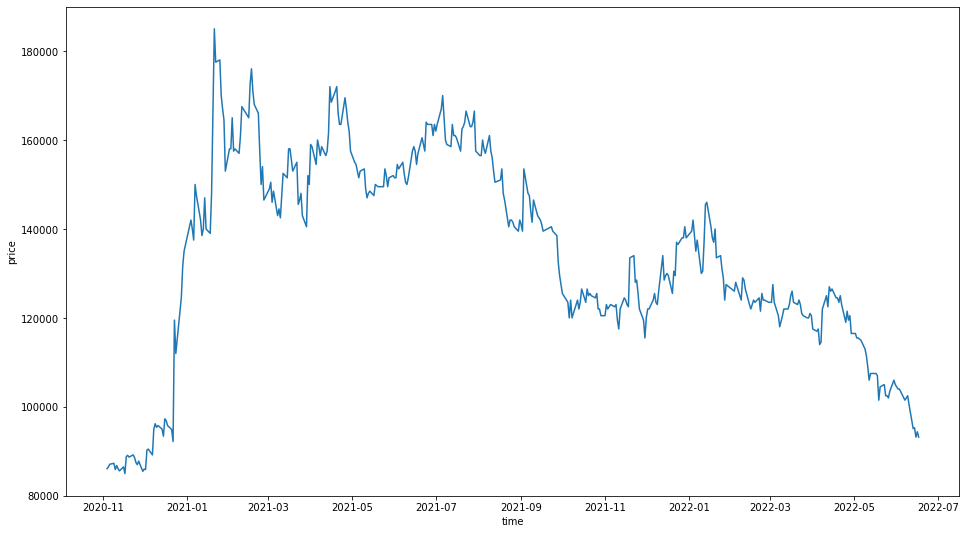

In [20]:
# 마지막 400번째 값은 2019년 11월로 2019년부터의 주가를 시각화한다.
import matplotlib.pyplot as plt
import seaborn as sns

df = df_price_2.loc[df_price_2['year']>=2019]

plt.figure(figsize=(16, 9))
sns.lineplot(y=df['close price'], x=df['date'])
plt.xlabel('time')
plt.ylabel('price')

In [21]:
# 머신러닝 모델의 원활한 학습을 위해 데이터 전처리, 즉 정규화를 해준다.
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 400개의 데이터가
# 0과 1 사이의 값을 가지도록 정규화해줬다.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scale_cols = ['open price', 'high price', 'low price', 'close price', 'trade amount']
df_scaled = scaler.fit_transform(df[scale_cols])

df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols

print(df_scaled)

     open price  high price  low price  close price  trade amount
0      0.075820    0.069353   0.077670        0.082      0.021313
1      0.095287    0.105904   0.097087        0.094      0.023146
2      0.093238    0.086223   0.083064        0.082      0.021711
3      0.075820    0.093721   0.085221        0.103      0.030153
4      0.134221    0.118088   0.111111        0.101      0.048104
..          ...         ...        ...          ...           ...
395    0.024590    0.014058   0.007551        0.009      0.024886
396    0.025615    0.018744   0.024811        0.023      0.010450
397    0.013320    0.008435   0.014024        0.021      0.016048
398    0.012295    0.007498   0.011866        0.015      0.018229
399    0.027664    0.016870   0.012945        0.011      0.011230

[400 rows x 5 columns]


In [22]:
TEST_SIZE = 200 # 과거로부터 200일 이전의 데이터를 학습하고 이 데이터로 모델이
# 주가를 예측한 다음 실제 데이터와 얼마나 오차가 있는지 TEST
train = df_scaled[:-TEST_SIZE]
test = df_scaled[-TEST_SIZE:]
# 시계열 데이터(일정한 시간동안 수집된 일련의 순차적으로 정해진 데이터)
# 의 데이터셋은 보통 window_size라고 정의합니다.
# window_size 만큼의 과거 동안 주가 데이터에 기반해 종가를 예측합니다.
# window_size = 20일 동안의 dataset을 순서대로 묶고 
# 이에 대한 예측 데이터와 함께 return해주는 함수
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

feature_cols = ['open price', 'high price', 'low price', 'trade amount']
label_cols = ['close price']

train_feature = train[feature_cols]
train_label = train[label_cols]

# train dataset
train_feature, train_label = make_dataset(train_feature, train_label, 20)

# train, validation set 생성
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)

x_train.shape, x_valid.shape

test_feature = test[feature_cols]
test_label = test[label_cols]
# test dataset (실제로 예측해볼 데이터)
test_feature, test_label = make_dataset(test_feature, test_label, 20)
test_feature.shape, test_label.shape

((180, 20, 4), (180, 1))

In [23]:
# Keras를 활용해 LSTM 모델을 생성하였습니다.
# LSTM 모델은 주가와 같은 시계열 데이터셋에 효과적인 모델입니다.
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(16, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=5)
model_path = 'model'
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x_train, y_train, 
                    epochs=200, 
                    batch_size=16,
                    validation_data=(x_valid, y_valid), 
                    callbacks=[early_stop, checkpoint])
# Epoch(트레이닝 셋이 신경망을 통과한 횟수)가 커질 수록 오차가 작아짐을 확인할 수 있습니다.

Epoch 1/200
8/9 [=========================>....] - ETA: 0s - loss: 0.0542
Epoch 1: val_loss improved from inf to 0.02639, saving model to model\tmp_checkpoint.h5
9/9 [==============================] - 3s 107ms/step - loss: 0.0513 - val_loss: 0.0264
Epoch 2/200
5/9 [===============>..............] - ETA: 0s - loss: 0.0245
Epoch 2: val_loss improved from 0.02639 to 0.00624, saving model to model\tmp_checkpoint.h5
9/9 [==============================] - 0s 29ms/step - loss: 0.0186 - val_loss: 0.0062
Epoch 3/200
6/9 [===================>..........] - ETA: 0s - loss: 0.0048
Epoch 3: val_loss improved from 0.00624 to 0.00129, saving model to model\tmp_checkpoint.h5
9/9 [==============================] - 0s 32ms/step - loss: 0.0036 - val_loss: 0.0013
Epoch 4/200
7/9 [======================>.......] - ETA: 0s - loss: 0.0017
Epoch 4: val_loss did not improve from 0.00129
9/9 [==============================] - 0s 33ms/step - loss: 0.0017 - val_loss: 0.0023
Epoch 5/200
7/9 [======================>

Epoch 36/200
6/9 [===================>..........] - ETA: 0s - loss: 0.0012    
Epoch 36: val_loss improved from 0.00104 to 0.00104, saving model to model\tmp_checkpoint.h5
9/9 [==============================] - 0s 31ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 37/200
7/9 [======================>.......] - ETA: 0s - loss: 9.1179e-04
Epoch 37: val_loss improved from 0.00104 to 0.00104, saving model to model\tmp_checkpoint.h5
9/9 [==============================] - 0s 26ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 38/200
8/9 [=========================>....] - ETA: 0s - loss: 0.0010
Epoch 38: val_loss did not improve from 0.00104
9/9 [==============================] - 0s 18ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 39/200
6/9 [===================>..........] - ETA: 0s - loss: 0.0011    
Epoch 39: val_loss improved from 0.00104 to 0.00103, saving model to model\tmp_checkpoint.h5
9/9 [==============================] - 0s 32ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 40/200
8/9 

6/9 [===================>..........] - ETA: 0s - loss: 8.4470e-04
Epoch 70: val_loss did not improve from 0.00089
9/9 [==============================] - 0s 19ms/step - loss: 8.6761e-04 - val_loss: 9.0605e-04
Epoch 71/200
6/9 [===================>..........] - ETA: 0s - loss: 7.1648e-04
Epoch 71: val_loss improved from 0.00089 to 0.00088, saving model to model\tmp_checkpoint.h5
9/9 [==============================] - 0s 31ms/step - loss: 8.2117e-04 - val_loss: 8.8178e-04
Epoch 72/200
9/9 [==============================] - ETA: 0s - loss: 8.3254e-04
Epoch 72: val_loss did not improve from 0.00088
9/9 [==============================] - 0s 25ms/step - loss: 8.3254e-04 - val_loss: 8.8304e-04
Epoch 73/200
9/9 [==============================] - ETA: 0s - loss: 8.0672e-04
Epoch 73: val_loss improved from 0.00088 to 0.00087, saving model to model\tmp_checkpoint.h5
9/9 [==============================] - 0s 33ms/step - loss: 8.0672e-04 - val_loss: 8.7103e-04
Epoch 74/200
9/9 [=====================

PermissionError: [Errno 13] Unable to create file (unable to open file: name = 'model\tmp_checkpoint.h5', errno = 13, error message = 'Permission denied', flags = 13, o_flags = 302)

In [24]:
model.load_weights(filename)
pred = model.predict(test_feature) # predict()를 활용하여 모형을 예측

pred.shape

6/6 [==============================] - 0s 3ms/step


(180, 1)

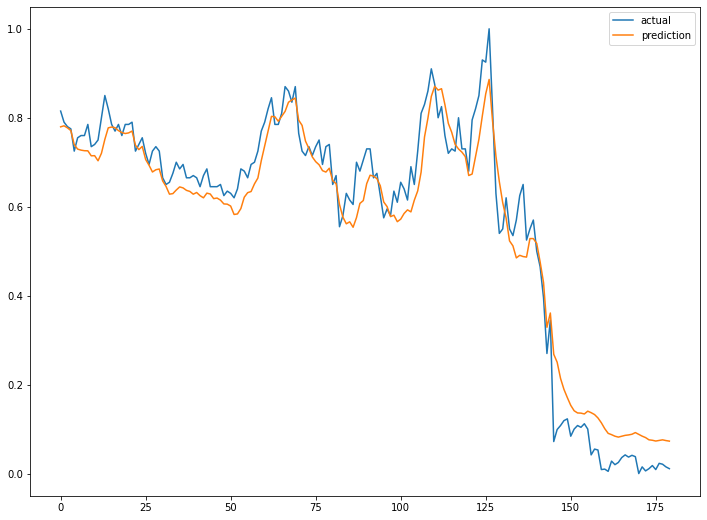

In [25]:
plt.figure(figsize=(12, 9))
plt.plot(test_label, label = 'actual')
plt.plot(pred, label = 'prediction')
plt.legend()
plt.show()